In [1]:
import pandas as pd
import requests
import zipfile
import os

## PULL DATA FROM A FILE AND STORE IN DATAFRAME

In [2]:
year = 2003

if (not os.path.exists(str(year))):
    os.mkdir(str(year))

url = f"https://static.nhtsa.gov/nhtsa/downloads/FARS/{year}/National/FARS{year}NationalCSV.zip"

r = requests.get(url)

if r.status_code == 200:
    zipf = f"{year}/{url.split('/')[-1]}"

    with open(zipf, "wb") as fo:
        fo.write(r.content)

        # unzip
        zipfile.ZipFile(zipf).extractall(str(year))            

In [3]:
df_person = pd.read_csv("2003/PERSON.CSV")

## REVIEW COLUMNS FOR DATA OF INTEREST

In [4]:
df_person.columns

Index(['STATE', 'VEH_NO', 'PER_NO', 'N_MOT_NO', 'AGE', 'SEX', 'PER_TYP',
       'SEAT_POS', 'REST_USE', 'AIR_BAG', 'EJECTION', 'EJ_PATH', 'EXTRICAT',
       'LOCATION', 'DRINKING', 'ALC_DET', 'ATST_TYP', 'ALC_RES', 'DRUGS',
       'DRUG_DET', 'DRUGTST1', 'DRUGRES1', 'DRUGTST2', 'DRUGRES2', 'DRUGTST3',
       'DRUGRES3', 'INJ_SEV', 'HOSPITAL', 'DEATH_MO', 'DEATH_DA', 'DEATH_HR',
       'DEATH_MN', 'LAG_HRS', 'LAG_MINS', 'RACE', 'HISPANIC', 'P_CF1', 'P_CF2',
       'P_CF3', 'WORK_INJ', 'DOA', 'ST_CASE', 'DEATH_YR', 'DEATH_TM',
       'CERT_NO', 'MAKE', 'BODY_TYP', 'ROLLOVER', 'TOW_VEH', 'SPEC_USE',
       'EMER_USE', 'IMPACT1', 'IMPACT2', 'IMPACTS', 'FIRE_EXP', 'MAK_MOD',
       'MOD_YEAR', 'VINA_MOD', 'SER_TR', 'VIN_BT', 'WHLBS_SH', 'WHLBS_LG',
       'MCYCL_DS', 'VIN_WGT', 'WGTCD_TR', 'COUNTY', 'MONTH', 'DAY', 'HOUR',
       'MINUTE', 'VE_FORMS', 'ROAD_FNC', 'HARM_EV', 'MAN_COLL', 'SCH_BUS'],
      dtype='object')

## USE [`cut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html) TO BIN THE DATA AS PER THE GRAPH

In [5]:
pd.cut(df_person.loc[:,'AGE'],
      [16, 24, 34, 44, 54, 64, 120]
      )

0          (16, 24]
1          (34, 44]
2          (54, 64]
3          (24, 34]
4          (24, 34]
            ...    
101857     (16, 24]
101858     (16, 24]
101859    (64, 120]
101860     (16, 24]
101861     (16, 24]
Name: AGE, Length: 101862, dtype: category
Categories (6, interval[int64, right]): [(16, 24] < (24, 34] < (34, 44] < (44, 54] < (54, 64] < (64, 120]]

## PLOT THE DATA

In [8]:
pd.cut(df_person.loc[:,'AGE'],
      [0, 16, 24, 34, 44, 54, 64, 120]
      ) \
    .value_counts()

(16, 24]     23176
(24, 34]     16729
(34, 44]     15628
(0, 16]      12766
(44, 54]     12694
(64, 120]    12635
(54, 64]      7770
Name: AGE, dtype: int64

<AxesSubplot:>

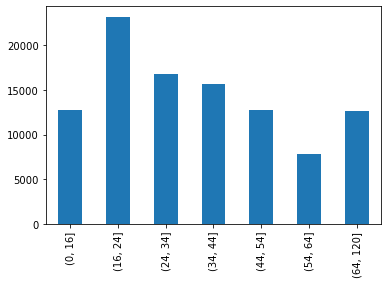

In [9]:
pd.cut(df_person.loc[:,'AGE'],
      [0, 16, 24, 34, 44, 54, 64, 120]
      ) \
    .value_counts() \
    .sort_index() \
    .plot(kind='bar')